ValueError: Operation on closed image

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=490x600 at 0x1F7869EDB00>

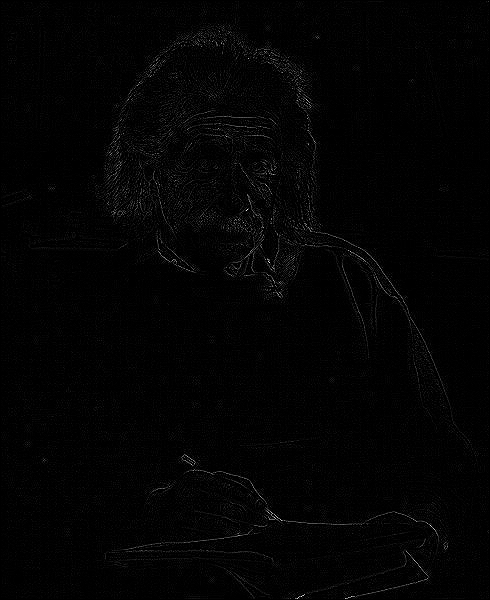

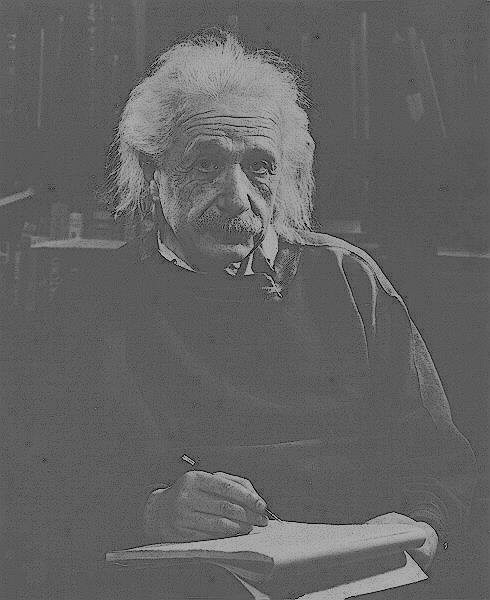

In [2]:
#Program to sharpen an image using 2-D laplacian high pass filter in spatial domain.

from PIL import Image
import numpy as np

def laplacian(img_path, save_path1,save_path2):
    with Image.open(img_path) as img:
        icol = img.size[0]
        irow = img.size[1]
        img_arr = np.array(img, dtype=np.uint8)
    display(img)
    img_new1 = np.zeros((irow, icol), dtype=np.uint8)
    img_new2 = np.zeros((irow, icol), dtype=np.uint8)
    for i in range(1,irow-1):
        for j in range(1,icol-1):
            p= (int(img_arr[i+1][j])+int(img_arr[i-1][j])+
            int(img_arr[i][j+1])+int(img_arr[i][j-1])-(4*int(img_arr[i][j])))
            if p<0:
                p=0
            elif p>255:
                p=255
            img_new1[i][j]=p


    result_img = Image.fromarray(img_new1)
    result_img.save(save_path1)
    display(result_img)
    for i in range(irow):
        for j in range(icol):
            p=int(img_arr[i][j])-int(img_new1[i][j])
            if p<0:
                p=0
            elif p>255:
                p=255
            img_new2[i][j]=p

    result_img2 = Image.fromarray(img_new2)
    result_img2.save(save_path2)
    display(result_img2)


laplacian("Fig0354(a)(einstein_orig).tif","laplacian.tif","Sharpened_laplacian.tif")